# Model `MEBF`

In [1]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

In [2]:
# # generating synthetic data

# from PyBMF.generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix(scaling=0.5)

c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[I] Found settings.ini at d:\MEGA\PyBMF\examples\settings.ini
[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


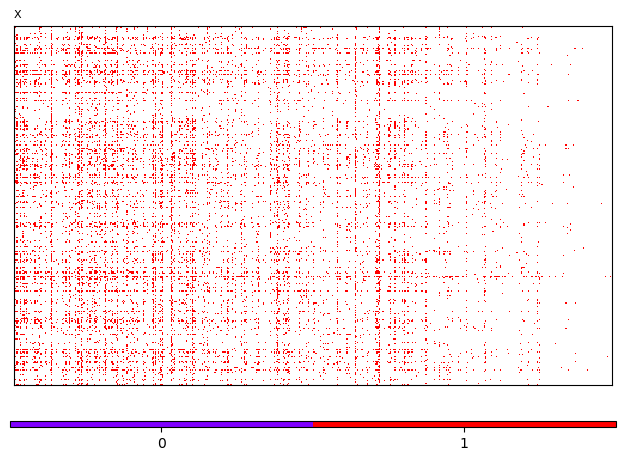

<Figure size 640x480 with 0 Axes>

In [3]:
# loading real-world data

from PyBMF.datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

data.show_matrix(scaling=0.5)

In [4]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1721989776
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1721989776


# AFP

Try to extract as many latent factors as possible to reudce error.

Note that exact decomposition (AFP with $\epsilon = 0$) is not available for this model.

[I] k            : None
[I] tol          : 0.0
[I] t            : 0.5
[I] w_fp         : 1
[I] w_fn         : 1
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] task         : reconstruction
[I] verbose      : True
[I]   save_model : True
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-07-26 18-29-37-020523 MEBF
[I] k: 0, pattern: [81, 23], d_cost: -801, cost: 9953, e: 9953.0, rs: 9422, err: 0.06635333333333338
[I] k: 1, pattern: [12, 41], d_cost: -192, cost: 9761, e: 9761.0, rs: 9080, err: 0.06507333333333332
[I] k: 2, pattern: [24, 22], d_cost: -158, cost: 9603, e: 9603.0, rs: 8747, err: 0.06401999999999997
[I] k: 3, pattern: [11, 21], d_cost: -77, cost: 9526, e: 9526.0, rs: 8612, err: 0.06350666666666671
[I] k: 4, pattern: [12, 23], d_cost: -98, cost: 9428, e: 9428.0, rs: 8425, err: 0.06285333333333332
[I] k: 5, pattern: [9, 20], d_cost: -66, cost: 9362, e: 9362.0, rs: 8305, err: 0.06241333333333332
[I] k: 6, pattern: [12, 

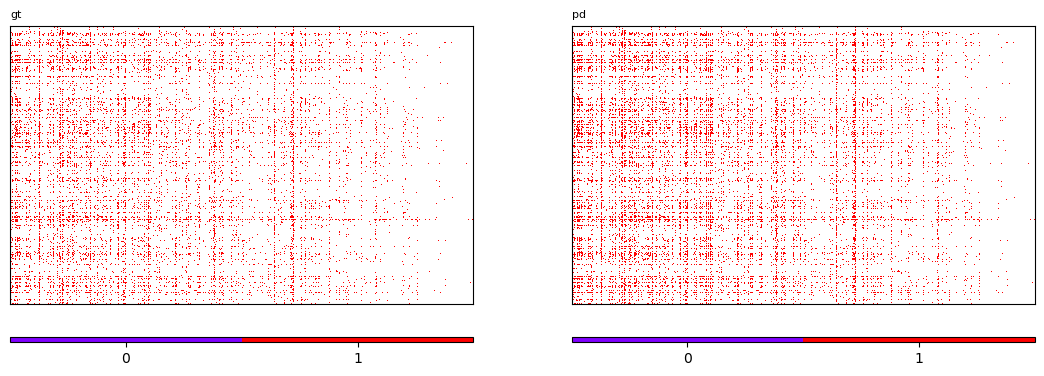

train                      \
                                                     0                       
                  time  cost     shape    rs    Recall Precision  Accuracy   
0    26/07/24 06:29:37  9953  [81, 23]  9422  0.123861  0.714976  0.933647   
1    26/07/24 06:29:37  9761  [12, 41]  9080  0.155663  0.710828  0.934927   
2    26/07/24 06:29:37  9603  [24, 22]  8747  0.186628  0.701013  0.935980   
3    26/07/24 06:29:37  9526  [11, 21]  8612  0.199182  0.700916  0.936493   
4    26/07/24 06:29:37  9428  [12, 23]  8425  0.216571  0.698980  0.937147   
5    26/07/24 06:29:37  9362   [9, 20]  8305  0.227729  0.698517  0.937587   
6    26/07/24 06:29:37  9315  [12, 11]  8219  0.235726  0.698155  0.937900   
7    26/07/24 06:29:37  9244  [11, 21]  8071  0.249489  0.695799  0.938373   
8    26/07/24 06:29:37  9217   [11, 7]  8022  0.254045  0.695696  0.938553   
9    26/07/24 06:29:37  9145  [11, 24]  7861  0.269016  0.692602  0.939033   
10   26/07/24 06:29:37  9116   [11, 6]  7817  0.273108  0.693343  0.939227   
11   26/07/24 06:29:37  9074   [6, 20]  7739  0.280361  0.693103  0.939507   
12   26/07/24 06:29:38  9054   [12, 4]  7705  0.283522  0.693270  0.939640   
13   26/07/24 06:29:38  9009  [11, 11]  7625  0.290962  0.693330  0.939940   
14   26/07/24 06:29:38  8953   [5, 20]  7552  0.297750  0.695633  0.940313   
15   26/07/24 06:29:38  8927   [3, 19]  7512  0.301469  0.696156  0.940487   
16   26/07/24 06:29:38  8875  [11, 19]  7387  0.313093  0.693512  0.940833   
17   26/07/24 06:29:38  8839   [11, 8]  7333  0.318114  0.694337  0.941073   
18   26/07/24 06:29:38  8812   [11, 6]  7290  0.322113  0.694745  0.941253   
19   26/07/24 06:29:38  8776   [5, 19]  7226  0.328064  0.694762  0.941493   
20   26/07/24 06:29:38  8758   [1, 18]  7208  0.329738  0.695840  0.941613   
21   26/07/24 06:29:38  8722   [4, 18]  7157  0.334480  0.696823  0.941853   
22   26/07/24 06:29:38  8691   [4, 19]  7108  0.339037  0.697265  0.942060   
23   26/07/24 06:29:38  8669   [2, 18]  7080  0.341640  0.698081  0.942207   
24   26/07/24 06:29:38  8649   [2, 18]  7052  0.344244  0.698622  0.942340   
25   26/07/24 06:29:38  8624   [3, 18]  7014  0.347778  0.699065  0.942507   
26   26/07/24 06:29:39  8598   [11, 6]  6969  0.351962  0.699113  0.942680   
27   26/07/24 06:29:39  8580   [1, 18]  6951  0.353636  0.700110  0.942800   
28   26/07/24 06:29:39  8540   [10, 9]  6888  0.359494  0.700616  0.943067   
29   26/07/24 06:29:39  8520   [2, 18]  6860  0.362098  0.701116  0.943200   
30   26/07/24 06:29:39  8496   [10, 4]  6831  0.364794  0.702040  0.943360   
31   26/07/24 06:29:39  8460   [3, 18]  6790  0.368607  0.703585  0.943600   
32   26/07/24 06:29:39  8440   [2, 17]  6764  0.371025  0.704200  0.943733   
33   26/07/24 06:29:39  8385  [10, 11]  6691  0.377813  0.705750  0.944100   
34   26/07/24 06:29:39  8346  [10, 10]  6622  0.384229  0.705601  0.944360   
35   26/07/24 06:29:39  8329   [1, 17]  6605  0.385810  0.706453  0.944473   
36   26/07/24 06:29:39  8312   [1, 17]  6588  0.387391  0.707301  0.944587   
37   26/07/24 06:29:39  8284   [10, 8]  6535  0.392319  0.706937  0.944773   
38   26/07/24 06:29:39  8266   [1, 18]  6517  0.393993  0.707818  0.944893   
39   26/07/24 06:29:40  8238   [3, 17]  6482  0.397248  0.708693  0.945080   
40   26/07/24 06:29:40  8209   [10, 6]  6440  0.401153  0.709190  0.945273   
41   26/07/24 06:29:40  8185   [10, 4]  6410  0.403943  0.709920  0.945433   
42   26/07/24 06:29:40  8161   [5, 17]  6356  0.408964  0.709012  0.945593   
43   26/07/24 06:29:40  8132   [3, 17]  6320  0.412312  0.709894  0.945787   
44   26/07/24 06:29:40  8114   [2, 17]  6294  0.414729  0.710191  0.945907   
45   26/07/24 06:29:40  8091   [3, 16]  6259  0.417984  0.710447  0.946060   
46   26/07/24 06:29:40  8075   [1, 16]  6243  0.419472  0.711178  0.946167   
47   26/07/24 06:29:40  8058   [10, 3]  6220  0.421611  0.711551  0.946280   
48   26/07/24 06:29:40  8042   [1, 16]  6204  0.423098  0.712273  0.946

<Figure size 640x480 with 0 Axes>

In [5]:
from PyBMF.models import MEBF

k = None
tol = 0.0
t = 0.5
w_fp = 1
w_fn = 1

model = MEBF(k=k, tol=tol, t=t, w_fp=w_fp, w_fn=w_fn)
model.fit(X_train=X_train, task='reconstruction', verbose=True, display=False, save_model=False)

# DBP

[I] k            : 20
[I] tol          : 0.0
[I] t            : 0.5
[I] w_fp         : 1
[I] w_fn         : 1
[I] verbose      : False
[I] display      : False
[I] save_model   : True
[I] task         : reconstruction
[I] verbose      : True
[I]   save_model : True
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-07-26 18-30-13-306332 MEBF
[I] k: 0, pattern: [81, 23], d_cost: -801, cost: 9953, e: 9953.0, rs: 9422, err: 0.06635333333333338
[I] k: 1, pattern: [12, 41], d_cost: -192, cost: 9761, e: 9761.0, rs: 9080, err: 0.06507333333333332
[I] k: 2, pattern: [24, 22], d_cost: -158, cost: 9603, e: 9603.0, rs: 8747, err: 0.06401999999999997
[I] k: 3, pattern: [11, 21], d_cost: -77, cost: 9526, e: 9526.0, rs: 8612, err: 0.06350666666666671
[I] k: 4, pattern: [12, 23], d_cost: -98, cost: 9428, e: 9428.0, rs: 8425, err: 0.06285333333333332
[I] k: 5, pattern: [9, 20], d_cost: -66, cost: 9362, e: 9362.0, rs: 8305, err: 0.06241333333333332
[I] k: 6, pattern: [12, 11

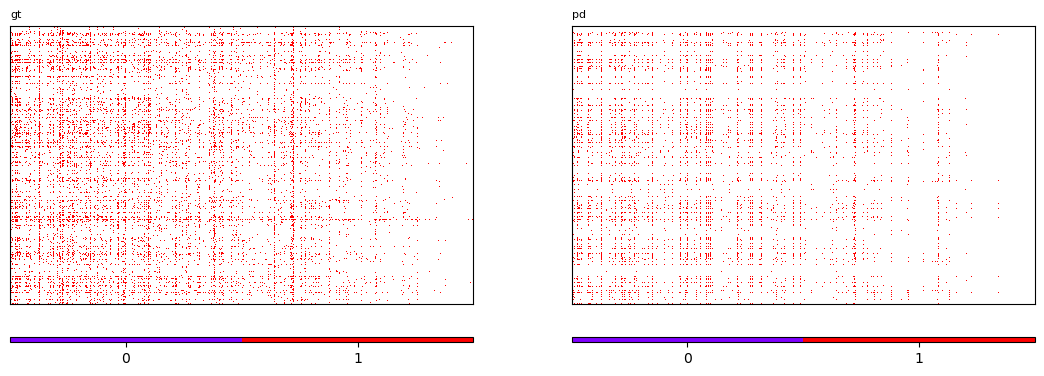

train                      \
                                                    0                       
                 time  cost     shape    rs    Recall Precision  Accuracy   
0   26/07/24 06:30:13  9953  [81, 23]  9422  0.123861  0.714976  0.933647   
1   26/07/24 06:30:13  9761  [12, 41]  9080  0.155663  0.710828  0.934927   
2   26/07/24 06:30:13  9603  [24, 22]  8747  0.186628  0.701013  0.935980   
3   26/07/24 06:30:13  9526  [11, 21]  8612  0.199182  0.700916  0.936493   
4   26/07/24 06:30:13  9428  [12, 23]  8425  0.216571  0.698980  0.937147   
5   26/07/24 06:30:13  9362   [9, 20]  8305  0.227729  0.698517  0.937587   
6   26/07/24 06:30:13  9315  [12, 11]  8219  0.235726  0.698155  0.937900   
7   26/07/24 06:30:13  9244  [11, 21]  8071  0.249489  0.695799  0.938373   
8   26/07/24 06:30:13  9217   [11, 7]  8022  0.254045  0.695696  0.938553   
9   26/07/24 06:30:14  9145  [11, 24]  7861  0.269016  0.692602  0.939033   
10  26/07/24 06:30:14  9116   [11, 6]  7817  0.273108  0.693343  0.939227   
11  26/07/24 06:30:14  9074   [6, 20]  7739  0.280361  0.693103  0.939507   
12  26/07/24 06:30:14  9054   [12, 4]  7705  0.283522  0.693270  0.939640   
13  26/07/24 06:30:14  9009  [11, 11]  7625  0.290962  0.693330  0.939940   
14  26/07/24 06:30:14  8953   [5, 20]  7552  0.297750  0.695633  0.940313   
15  26/07/24 06:30:14  8927   [3, 19]  7512  0.301469  0.696156  0.940487   
16  26/07/24 06:30:14  8875  [11, 19]  7387  0.313093  0.693512  0.940833   
17  26/07/24 06:30:14  8839   [11, 8]  7333  0.318114  0.694337  0.941073   
18  26/07/24 06:30:14  8812   [11, 6]  7290  0.322113  0.694745  0.941253   
19  26/07/24 06:30:14  8776   [5, 19]  7226  0.328064  0.694762  0.941493   

              
              
          F1  
0   0.211144  
1   0.255397  
2   0.294779  
3   0.310210  
4   0.330683  
5   0.343478  
6   0.352450  
7   0.367283  
8   0.372182  
9   0.387516  
10  0.391861  
11  0.399232  
12  0.402455  
13  0.409904  
14  0.417009  
15  0.420738  
16  0.431418  
17  0.436324  
18  0.440152  
19  0.445680

<Figure size 640x480 with 0 Axes>

In [6]:
from PyBMF.models import MEBF

k = 20
tol = 0.0
t = 0.5
w_fp = 1
w_fn = 1

model = MEBF(k=k, tol=tol, t=t, w_fp=w_fp, w_fn=w_fn)
model.fit(X_train=X_train, task='reconstruction', verbose=True, display=False, save_model=False)